# 바로 아래를 먼저 실행시키고, 바로 아래의 주소를 클릭 !!

# 여기 주소를 클릭  :  http://localhost:5000  

In [ ]:
!python  web_babi.py 


# localhost:5000

# 바로 위는 웹 기반의 바비 환경을 보여준다

<p>
    
# 또한 각 story 지문에 대한 attention 값을 보여준다
 
<p>
        
# =============================================

# 학기말 과제: QA 질문답변 등등 교육용 챗봇을 설계하자 !!

<p> &nbsp;
    
# =============================================

# AI 융합수학교육 (수학교육 응용 + 데이터 수집 + 선처리 +  AI 코딩) 


<p> &nbsp;
    
    
# 학기말 과제 힌트 : 0.ipynb 와 여기의 web_babi.ipynb 그리고 
    
# 4.ipynb 코드를 기반으로,  교육용 데이터가 중심인 챗봇 설계 !

# Keras 코딩의 단계 : 예를 들어,  손글씨 숫자 알아내기 

In [6]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 훈련셋과 검증셋 분리
x_val = x_train[:42000]   # 데이터셋의 70%를 훈련셋/학습셋으로 사용
x_train = x_train[42000:] # 데이터셋의 30%를 검증셋으로 사용
y_val = y_train[:42000]   # 데이터셋의 70%를 훈련셋/학습셋으로 사용
y_train = y_train[42000:] # 데이터셋의 30%를 검증셋으로 사용

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

# 6. 모델 저장하기
from keras.models import load_model
model.save('./data_babi/mnist_model.h5')

Train on 18000 samples, validate on 42000 samples
Epoch 1/5
18000/18000 [==============================] - 3s 181us/step - loss: 1.2557 - accuracy: 0.6849 - val_loss: 0.7199 - val_accuracy: 0.8213
Epoch 2/5
18000/18000 [==============================] - 3s 188us/step - loss: 0.5625 - accuracy: 0.8538 - val_loss: 0.5100 - val_accuracy: 0.8621
Epoch 3/5
18000/18000 [==============================] - 3s 194us/step - loss: 0.4365 - accuracy: 0.8809 - val_loss: 0.4307 - val_accuracy: 0.8814
Epoch 4/5
18000/18000 [==============================] - 4s 197us/step - loss: 0.3812 - accuracy: 0.8936 - val_loss: 0.3899 - val_accuracy: 0.8899
Epoch 5/5
10000/10000 [==============================] - 0s 44us/step

loss_and_metrics : [0.33985268929600715, 0.90420001745224]


# Keras 학습된 모델 불러와 다시 쓰기

In [10]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax


# 2-0. 실무에 사용할 데이터 준비하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 훈련셋과 검증셋 분리
x_val = x_train[:42000]   # 데이터셋의 70%를 훈련셋/학습셋으로 사용
x_train = x_train[42000:] # 데이터셋의 30%를 검증셋으로 사용
y_val = y_train[:42000]   # 데이터셋의 70%를 훈련셋/학습셋으로 사용
y_train = y_train[42000:] # 데이터셋의 30%를 검증셋으로 사용

###########################################


# 2-1. 모델 불러오기

from keras.models import load_model

model = load_model('./data_babi/mnist_model_15.h5')


# 2-2. 모델 다시 사용하기

xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]
zhat = y_test[xhat_idx]
yhat = model.predict_classes(xhat)
print( zhat )
print( yhat )

#######################


# 2-3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 2-4. 모델 학습 플러스 알파 더 시키기
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))



# 2-5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

# 2-6. 모델 저장하기
from keras.models import load_model
model.save('./data_babi/mnist_model.h5')


for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[4 4 4 9 9]
Train on 18000 samples, validate on 42000 samples
Epoch 1/5
18000/18000 [==============================] - 4s 231us/step - loss: 0.2602 - accuracy: 0.9263 - val_loss: 0.2959 - val_accuracy: 0.9174
Epoch 2/5
18000/18000 [==============================] - 4s 211us/step - loss: 0.2515 - accuracy: 0.9291 - val_loss: 0.2856 - val_accuracy: 0.9195
Epoch 3/5
18000/18000 [==============================] - 4s 237us/step - loss: 0.2435 - accuracy: 0.9322 - val_loss: 0.2832 - val_accuracy: 0.9203
Epoch 4/5
18000/18000 [==============================] - 4s 232us/step - loss: 0.2363 - accuracy: 0.9334 - val_loss: 0.2748 - val_accuracy: 0.9220
Epoch 5/5
10000/10000 [==============================] - 0s 38us/step

loss_and_metrics : [0.2469834449470043, 0.9290000200271606]
True : 4, Predict : 4
True : 4, Predict : 4
True : 4,

# 위의 예제를 바탕으로, Babi 를 탐구하자 !!

# ===============================

# Keras 코딩 : Babi 프로젝트 20개 문제

## 바비 데이터 github  : https://github.com/andri27-ts/bAbI

<p>


# 수학교육 탐구과제로 도전가능한 문제 타입은 무엇인가 ??    
    
### 바비 데이터 : https://github.com/harvardnlp/MemN2N/tree/master/babi_data/en

# 아래의 Keras 코드는 같은 모양의 코드로, 각각  바비의 1번 ,
<p>
    
# 6번, 2번 문제를 다룬다. 여기의 같은 모양인 3개의 코드를
    
<p>
    
# (사실은 1개) 에 각 단계에 대한 주석을 달아 서로 나누자 !!
    
<p> 
    
    
# =================== 과제 ======================
    
<p>
<font color=blue>
    
# [[ 과제 공지 ]] 아래 과제에 대해 각자 준비하여 4월 첫주에 제출한다
    
<p>
    
# 다른 17개의 타입에 대해 각자 하나씩 잡아 ipynb 코딩으로 탐구하고, 
    
<p>
    
# 한글화 및 교육에의 적용 가능성을 ipynb 주석으로 작성해서 제출 !! 
    
</font>

In [1]:
'''
Trains a memory network on the facebook bAbI dataset for Question/Answering System.

'''

# 단계 1 : 바비 탐구의 라이브러리를 import 한다

import keras
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM, GRU

#from keras.utils.data_utils import get_file
from keras.preprocessing.sequence import pad_sequences
from keras import backend as K

from functools import reduce
import tarfile
import numpy as np
import re



Using TensorFlow backend.


In [7]:

def tokenize(sent):
    '''
    Return the tokens of a sentence including punctuation.
    >>> tokenize('Bob dropped the apple. Where is the apple?')
    ['Bob', 'dropped', 'the', 'apple', '.', 'Where', 'is', 'the', 'apple', '?']
    '''
    # 정규표현식
    # \W: 단어를 만들 수 있는 문자(a-zA-Z,_,0-9)를 제외한 모든 글자.
    # +: 1개 이상 등장
    # String.strip(): 양 끝의 \n과 공백 삭제
    return [x.strip() for x in re.split('(\W+)+', sent) if x.strip()]


def parse_stories(lines, only_supporting=False):
    '''
    Parse stories provided in the bAbi tasks format
    If only_supporting is true, only the sentences
    that support the answer are kept.
    '''
    data = []
    story = []
    for line in lines:
        line = line.decode('utf-8').strip()
        # String.split(separator, maxsplit): maxsplit번 만큼만 자른다
        nid, line = line.split(' ', 1)
        nid = int(nid)
        # whenever new story starts, initialize stored story
        if nid == 1:
            story = []
        
        if '\t' in line:
            q, a, supporting = line.split('\t')
            q = tokenize(q)
            substory = None
            if only_supporting:
                # Only select the related substory
                supporting = map(int, supporting.split())
                substory = [story[i - 1] for i in supporting]
            else:
                # Provide all the substories
                substory = [x for x in story if x]
            data.append((substory, q, a))
            story.append('')
        else:
            sent = tokenize(line)
            story.append(sent)
    return data


def get_stories(f, only_supporting=False, max_length=None):
    '''Given a file name, read the file,
    retrieve the stories,
    and then convert the sentences into a single story.
    If max_length is supplied,
    any stories longer than max_length tokens will be discarded.
    '''
    data = parse_stories(f.readlines(), only_supporting=only_supporting)
    flatten = lambda data: reduce(lambda x, y: x + y, data)
    data = [(flatten(story), q, answer) for story, q, answer in data if not max_length or len(flatten(story)) < max_length]
    return data


def vectorize_stories(data, word_idx, story_maxlen, query_maxlen):
    X = []
    Xq = []
    Y = []
    for story, query, answer in data:
        x = [word_idx[w] for w in story]
        xq = [word_idx[w] for w in query]
        # let's not forget that index 0 is reserved
        y = np.zeros(len(word_idx) + 1)
        y[word_idx[answer]] = 1
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return (pad_sequences(X, maxlen=story_maxlen),
            pad_sequences(Xq, maxlen=query_maxlen), np.array(Y))



# 단계 2 : 바비 데이터를 불러온다
# 이미 data_babi 에 준비된 문제를 불러옴

path='./data_babi/babi-tasks-v1-2.tar.gz'

tar = tarfile.open(path)

challenges = {
    # QA1 with 10,000 samples
    'single_supporting_fact_10k': 'tasks_1-20_v1-2/en-10k/qa1_single-supporting-fact_{}.txt',
    
    # QA2 with 10,000 samples
    'two_supporting_facts_10k': 'tasks_1-20_v1-2/en-10k/qa2_two-supporting-facts_{}.txt',
}

challenge_type = 'single_supporting_fact_10k'
#  challenge_type = 'two_supporting_facts_10k'
# 두 가지 경우에 각각 해본다 ......

challenge = challenges[challenge_type]


# 단계 3 : 단어장 등의 데이터를 만든다.
# 데이터 선처리 

print('Extracting stories for the challenge:', challenge_type)
train_stories = get_stories(tar.extractfile(challenge.format('train')))
test_stories = get_stories(tar.extractfile(challenge.format('test')))

vocab = set()

vocab = set()
for story, q, answer in train_stories + test_stories:
    vocab |= set(story + q + [answer])
 
vocab = sorted(vocab)

# Reserve 0 for masking via pad_sequences
vocab_size = len(vocab) + 1
story_maxlen = max(map(len, (x for x, _, _ in train_stories + test_stories)))
query_maxlen = max(map(len, (x for _, x, _ in train_stories + test_stories)))

print('-')
print('Vocab size:', vocab_size, 'unique words')
print('Story max length:', story_maxlen, 'words')
print('Query max length:', query_maxlen, 'words')
print('Number of training stories:', len(train_stories))
print('Number of test stories:', len(test_stories))
print('-')
print('Here\'s what a "story" tuple looks like (input, query, answer):')
print(train_stories[0])
print('-')
print('Vectorizing the word sequences...')

word_idx = dict((c, i + 1) for i, c in enumerate(vocab))
idx_word = dict((i+1, c) for i,c in enumerate(vocab))

inputs_train, queries_train, answers_train = vectorize_stories(train_stories,
                                                               word_idx,
                                                               story_maxlen,
                                                               query_maxlen)

inputs_test, queries_test, answers_test = vectorize_stories(test_stories,
                                                            word_idx,
                                                            story_maxlen,
                                                            query_maxlen)

print('-')
print('inputs: integer tensor of shape (samples, max_length)')
print('inputs_train shape:', inputs_train.shape)
print('inputs_test shape:', inputs_test.shape)
print('-')
print('queries: integer tensor of shape (samples, max_length)')
print('queries_train shape:', queries_train.shape)
print('queries_test shape:', queries_test.shape)
print('-')
print('answers: binary (1 or 0) tensor of shape (samples, vocab_size)')
print('answers_train shape:', answers_train.shape)
print('answers_test shape:', answers_test.shape)
print('-')
print('Compiling...')



Extracting stories for the challenge: single_supporting_fact_10k
-
Vocab size: 22 unique words
Story max length: 68 words
Query max length: 4 words
Number of training stories: 10000
Number of test stories: 1000
-
Here's what a "story" tuple looks like (input, query, answer):
(['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'John', 'went', 'to', 'the', 'hallway', '.'], ['Where', 'is', 'Mary', '?'], 'bathroom')
-
Vectorizing the word sequences...
-
inputs: integer tensor of shape (samples, max_length)
inputs_train shape: (10000, 68)
inputs_test shape: (1000, 68)
-
queries: integer tensor of shape (samples, max_length)
queries_train shape: (10000, 4)
queries_test shape: (1000, 4)
-
answers: binary (1 or 0) tensor of shape (samples, vocab_size)
answers_train shape: (10000, 22)
answers_test shape: (1000, 22)
-
Compiling...


Input sequence: Tensor("input_3:0", shape=(None, 68), dtype=float32)
Question: Tensor("input_4:0", shape=(None, 4), dtype=float32)
Input encoded m Tensor("sequential_6/dropout_5/cond/Identity:0", shape=(None, 68, 64), dtype=float32)
Input encoded c Tensor("sequential_7/dropout_6/cond/Identity:0", shape=(None, 68, 4), dtype=float32)
Question encoded Tensor("sequential_8/dropout_7/cond/Identity:0", shape=(None, 4, 64), dtype=float32)
(None, 68, 4)
Match shape Tensor("activation_3/truediv:0", shape=(None, 68, 4), dtype=float32)
Response shape Tensor("permute_2/transpose:0", shape=(None, 4, 68), dtype=float32)
Answer shape Tensor("concatenate_2/concat:0", shape=(None, 4, 132), dtype=float32)
-------------Model Summary------------
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 68)       

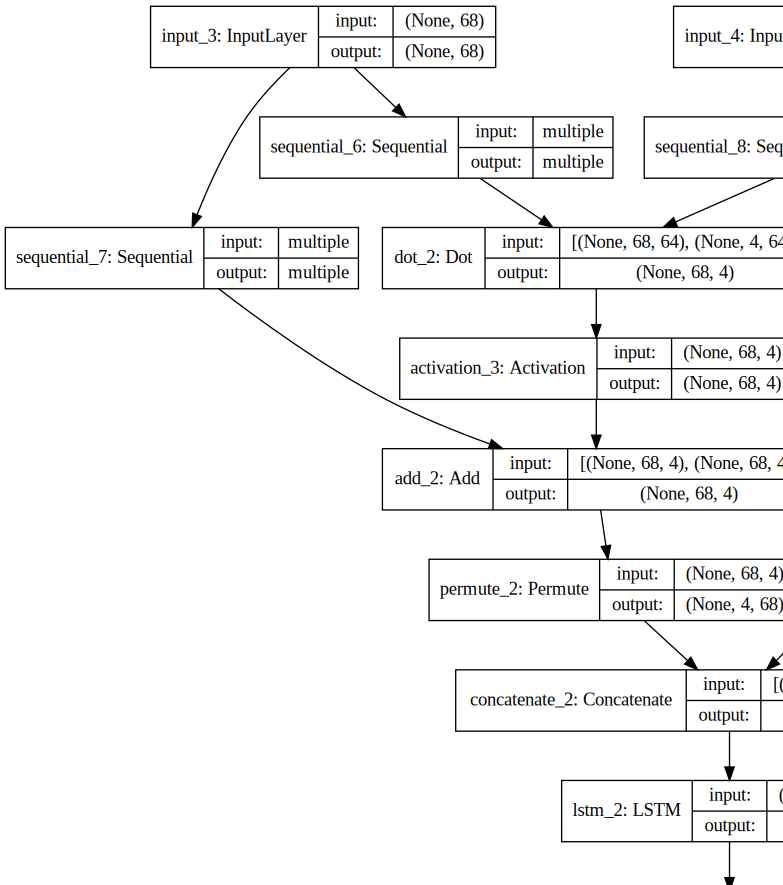

In [13]:
# 단계 4 : computaitonal graph 구성
# 변수와 딥러닝 모델을 만든다 

# placeholders

input_sequence = Input((story_maxlen,))
question = Input((query_maxlen,))

print('Input sequence:', input_sequence)
print('Question:', question)

# encoders
# embed the input sequence into a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,
                              output_dim=64))
input_encoder_m.add(Dropout(0.3))
# output: (samples, story_maxlen, embedding_dim)

# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,
                              output_dim=query_maxlen))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=query_maxlen))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
print('Input encoded m', input_encoded_m)
input_encoded_c = input_encoder_c(input_sequence)
print('Input encoded c', input_encoded_c)
question_encoded = question_encoder(question)
print('Question encoded', question_encoded)


# compute a 'match' between the first input vector sequence
# and the question vector sequence
# shape: `(samples, story_maxlen, query_maxlen)
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
print(match.shape)
match = Activation('softmax')(match)
print('Match shape', match)

# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)
print('Response shape', response)

# concatenate the response vector with the question vector sequence
answer = concatenate([response, question_encoded])
print('Answer shape', answer)

#answer = LSTM(lstm_size, return_sequences=True)(answer)  # Generate tensors of shape 32
#answer = Dropout(0.3)(answer)
answer = LSTM(lstm_size)(answer)  # Generate tensors of shape 32
answer = Dropout(0.3)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)
# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

print("-------------Model Summary------------")
print(model.summary())
# 모델 구조를 쓰고 그리기 

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [15]:
단계 5: epoch 와 batch size 등을 정하고 학습시킨다. 
    
    
train_epochs = 100
# 에포크


batch_size = 32
lstm_size = 64



# train, batch_size = 32 and epochs = 120

print("Trainig the model")
model.fit([inputs_train, queries_train], answers_train, 
          batch_size, # 배치 크기
          train_epochs,  # 에포크
          validation_data=([inputs_test, queries_test], answers_test))


model.save('./data_babi/babi_model1.h5')

print('-------------------------------------------------------------------------------------------')
print('Qualitative Test Result Analysis')

for i in range(0,10):
    current_inp = test_stories[i]
    current_story, current_query, current_answer = vectorize_stories([current_inp], word_idx, story_maxlen, query_maxlen)
    current_prediction = model.predict([current_story, current_query])
    current_prediction = idx_word[np.argmax(current_prediction)]
    print(' '.join(current_inp[0]), ' '.join(current_inp[1]), '| Prediction:', current_prediction, '| Ground Truth:', current_inp[2])




Trainig the model
Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 3s 349us/step - loss: 0.0251 - accuracy: 0.9928 - val_loss: 0.0788 - val_accuracy: 0.9810
Epoch 2/100
10000/10000 [==============================] - 3s 325us/step - loss: 0.0358 - accuracy: 0.9898 - val_loss: 0.0585 - val_accuracy: 0.9820
Epoch 3/100
10000/10000 [==============================] - 3s 327us/step - loss: 0.0243 - accuracy: 0.9922 - val_loss: 0.0759 - val_accuracy: 0.9800
Epoch 4/100
10000/10000 [==============================] - 3s 337us/step - loss: 0.0276 - accuracy: 0.9926 - val_loss: 0.0593 - val_accuracy: 0.9820
Epoch 5/100
10000/10000 [==============================] - 3s 321us/step - loss: 0.0219 - accuracy: 0.9937 - val_loss: 0.0601 - val_accuracy: 0.9820
Epoch 6/100
10000/10000 [==============================] - 3s 318us/step - loss: 0.0162 - accuracy: 0.9949 - val_loss: 0.0454 - val_accuracy: 0.9880
Epoch 7/100
10000/10000 [==============

# +++++++++++++++++++++++++++


# 바비 문제 20 가지를 교육적 관점에서 탐구한다

<p>
    
# 한글화로, 수학교육용 등으로 설계함을 탐구한다



# +++++++++++++++++++++++++++ 

# 0.ipynb 에서 다루었던 yes-no 바비 6번 문제타입을 다룬다.

Extracting stories for the challenge: qa6_yes_no_ques_10k
-
Vocab size: 38 unique words
Story max length: 156 words
Query max length: 6 words
Number of training stories: 10000
Number of test stories: 1000
-
Here's what a "story" tuple looks like (input, query, answer):
(['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.', 'Mary', 'went', 'back', 'to', 'the', 'bedroom', '.', 'Daniel', 'went', 'back', 'to', 'the', 'hallway', '.'], ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'], 'no')
-
Vectorizing the word sequences...
-
inputs: integer tensor of shape (samples, max_length)
inputs_train shape: (10000, 156)
inputs_test shape: (1000, 156)
-
queries: integer tensor of shape (samples, max_length)
queries_train shape: (10000, 6)
queries_test shape: (1000, 6)
-
answers: binary (1 or 0) tensor of shape (samples, vocab_size)
answers_train shape: (10000, 38)
answers_test shape: (1000, 38)
-
Compiling...


C:\WinPython37F\python-3.7.2.amd64\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 10000 samples, validate on 1000 samples
Epoch 1/10
10000/10000 [==============================] - 8s 796us/step - loss: 0.8419 - accuracy: 0.4939 - val_loss: 0.6952 - val_accuracy: 0.5030
Epoch 2/10
10000/10000 [==============================] - 7s 706us/step - loss: 0.7011 - accuracy: 0.5017 - val_loss: 0.6965 - val_accuracy: 0.4970
Epoch 3/10
10000/10000 [==============================] - 7s 684us/step - loss: 0.6960 - accuracy: 0.5006 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 4/10
10000/10000 [==============================] - 7s 717us/step - loss: 0.6942 - accuracy: 0.5088 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 5/10
10000/10000 [==============================] - 5s 550us/step - loss: 0.6948 - accuracy: 0.4910 - val_loss: 0.6935 - val_accuracy: 0.4990
Epoch 6/10
10000/10000 [==============================] - 7s 700us/step - loss: 0.6940 - accuracy: 0.4986 - val_loss: 0.6942 - val_accuracy: 0.4970
Epoch 7/10
10000/10000 [==============================] - 7s 70

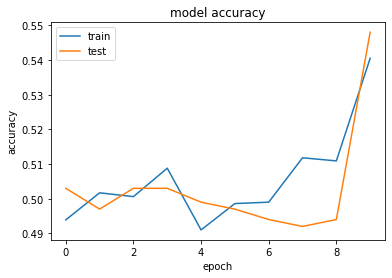

Story is: Daniel moved to the hallway . Daniel picked up the football there . Daniel travelled to the garden . Daniel journeyed to the hallway .
Question is:  Is Daniel in the kitchen ?
Actual answer is:  no
Machine answer is:  no
I am  0.5618641 certain of it


In [11]:
'''Trains a memory network on the bAbI dataset.
References:
- Jason Weston, Antoine Bordes, Sumit Chopra, Tomas Mikolov, Alexander M. Rush,
  "Towards AI-Complete Question Answering: A Set of Prerequisite Toy Tasks",
  http://arxiv.org/abs/1502.05698
- Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, Rob Fergus,
  "End-To-End Memory Networks",
  http://arxiv.org/abs/1503.08895
Reaches 98.6% accuracy on task 'single_supporting_fact_10k' after 120 epochs.
Time per epoch: 3s on CPU (core i7).
'''
from __future__ import print_function

from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM
#from keras.utils.data_utils import get_file
from keras.preprocessing.sequence import pad_sequences
from functools import reduce
import tarfile
import numpy as np
import re


def tokenize(sent):
    '''Return the tokens of a sentence including punctuation.
    >>> tokenize('Bob dropped the apple. Where is the apple?')
    ['Bob', 'dropped', 'the', 'apple', '.', 'Where', 'is', 'the', 'apple', '?']
    '''
    return [x.strip() for x in re.split('(\W+)+', sent) if x.strip()]


def parse_stories(lines, only_supporting=False):
    '''Parse stories provided in the bAbi tasks format
    If only_supporting is true, only the sentences
    that support the answer are kept.
    '''
    data = []
    story = []
    for line in lines:
        line = line.decode('utf-8').strip()
        nid, line = line.split(' ', 1)
        nid = int(nid)
        if nid == 1:
            story = []
        if '\t' in line:
            q, a, supporting = line.split('\t')
            q = tokenize(q)
            substory = None
            if only_supporting:
                # Only select the related substory
                supporting = map(int, supporting.split())
                substory = [story[i - 1] for i in supporting]
            else:
                # Provide all the substories
                substory = [x for x in story if x]
            data.append((substory, q, a))
            story.append('')
        else:
            sent = tokenize(line)
            story.append(sent)
    return data


def get_stories(f, only_supporting=False, max_length=None):
    '''Given a file name, read the file,
    retrieve the stories,
    and then convert the sentences into a single story.
    If max_length is supplied,
    any stories longer than max_length tokens will be discarded.
    '''
    data = parse_stories(f.readlines(), only_supporting=only_supporting)
    flatten = lambda data: reduce(lambda x, y: x + y, data)
    data = [(flatten(story), q, answer) for story, q, answer in data if not max_length or len(flatten(story)) < max_length]
    return data


def vectorize_stories(data, word_idx, story_maxlen, query_maxlen):
    X = []
    Xq = []
    Y = []
    for story, query, answer in data:
        x = [word_idx[w] for w in story]
        xq = [word_idx[w] for w in query]
        # let's not forget that index 0 is reserved
        y = np.zeros(len(word_idx) + 1)
        y[word_idx[answer]] = 1
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return (pad_sequences(X, maxlen=story_maxlen),
            pad_sequences(Xq, maxlen=query_maxlen), np.array(Y))

"""
try:
    path = get_file('babi-tasks-v1-2.tar.gz', origin='https://s3.amazonaws.com/text-datasets/babi_tasks_1-20_v1-2.tar.gz')
except:
    print('Error downloading dataset, please download it manually:\n'
          '$ wget http://www.thespermwhale.com/jaseweston/babi/tasks_1-20_v1-2.tar.gz\n'
          '$ mv tasks_1-20_v1-2.tar.gz ~/.keras/datasets/babi-tasks-v1-2.tar.gz')
    raise
"""
    
path='./data_babi/babi-tasks-v1-2.tar.gz'
tar = tarfile.open(path)

challenges = {
    # QA1 with 10,000 samples
    'single_supporting_fact_10k': 'tasks_1-20_v1-2/en-10k/qa1_single-supporting-fact_{}.txt',
    # QA2 with 10,000 samples
    'two_supporting_facts_10k': 'tasks_1-20_v1-2/en-10k/qa2_two-supporting-facts_{}.txt',

    'two_arg_relations_10k': 'tasks_1-20_v1-2/en-10k/qa4_two-arg-relations_{}.txt',

    'qa6_yes_no_ques_10k': 'tasks_1-20_v1-2/en-10k/qa6_yes-no-questions_{}.txt',
}

challenge_type = 'qa6_yes_no_ques_10k'

challenge = challenges[challenge_type]

print('Extracting stories for the challenge:', challenge_type)
train_stories = get_stories(tar.extractfile(challenge.format('train')))
test_stories = get_stories(tar.extractfile(challenge.format('test')))

vocab = set()
for story, q, answer in train_stories + test_stories:
    vocab |= set(story + q + [answer])
vocab = sorted(vocab)

# Reserve 0 for masking via pad_sequences
vocab_size = len(vocab) + 1
story_maxlen = max(map(len, (x for x, _, _ in train_stories + test_stories)))
query_maxlen = max(map(len, (x for _, x, _ in train_stories + test_stories)))

print('-')
print('Vocab size:', vocab_size, 'unique words')
print('Story max length:', story_maxlen, 'words')
print('Query max length:', query_maxlen, 'words')
print('Number of training stories:', len(train_stories))
print('Number of test stories:', len(test_stories))
print('-')
print('Here\'s what a "story" tuple looks like (input, query, answer):')
print(train_stories[1])
print('-')
print('Vectorizing the word sequences...')

word_idx = dict((c, i + 1) for i, c in enumerate(vocab))
inputs_train, queries_train, answers_train = vectorize_stories(train_stories,
                                                               word_idx,
                                                               story_maxlen,
                                                               query_maxlen)
inputs_test, queries_test, answers_test = vectorize_stories(test_stories,
                                                            word_idx,
                                                            story_maxlen,
                                                            query_maxlen)

print('-')
print('inputs: integer tensor of shape (samples, max_length)')
print('inputs_train shape:', inputs_train.shape)
print('inputs_test shape:', inputs_test.shape)
print('-')
print('queries: integer tensor of shape (samples, max_length)')
print('queries_train shape:', queries_train.shape)
print('queries_test shape:', queries_test.shape)
print('-')
print('answers: binary (1 or 0) tensor of shape (samples, vocab_size)')
print('answers_train shape:', answers_train.shape)
print('answers_test shape:', answers_test.shape)
print('-')
print('Compiling...')

# placeholders
input_sequence = Input((story_maxlen,))
question = Input((query_maxlen,))

# encoders
# embed the input sequence into a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,
                              output_dim=64))
input_encoder_m.add(Dropout(0.3))
# output: (samples, story_maxlen, embedding_dim)

# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,
                              output_dim=query_maxlen))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=query_maxlen))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

# compute a 'match' between the first input vector sequence
# and the question vector sequence
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

# the original paper uses a matrix multiplication for this reduction step.
# we choose to use a RNN instead.
answer = LSTM(32)(answer)  # (samples, 32)

# one regularization layer -- more would probably be needed.
answer = Dropout(0.3)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)
# we output a probability distribution over the vocabularypath='./data_babi/babi-tasks-v1-2.tar.gz'
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

# train
history = model.fit([inputs_train, queries_train], answers_train,
          batch_size=32,
          epochs=10, # 에포크
          validation_data=([inputs_test, queries_test], answers_test))

# list all data in history
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


model_path1 = './data_babi/model6.h5'
model.save(model_path1)
#model save as pickle file
# model load again
# write story answer question in the format in a text file

model.load_weights(model_path1)
pred_results = model.predict(([inputs_test, queries_test]))
# Display a selected test story

n = np.random.randint(0,1000)
story_list = test_stories[n][0]
story =' '.join(word for word in story_list)
print("Story is:",story)

question_list = test_stories[n][1]
ques =' '.join(word for word in question_list)
print("Question is: ",ques)

ans = test_stories[n][2]
print("Actual answer is: ", ans)

#Generate prediction from model

val_max = np.argmax(pred_results[n])

for key, val in word_idx.items():
    if val == val_max:
        k = key

print("Machine answer is: ", k)
print("I am ", pred_results[n][val_max], "certain of it")

## Read my own file

# f = open(r"C:\Users\priya\Documents\my_dl\qachatbot\my_test_q2.txt", "r")
# print(f.readlines())
# data = parse_stories(f.readlines(), only_supporting=False)
# print(data)
# extra_stories = get_stories(f, only_supporting=False, max_length=None)
#
# print(extra_stories)

# 바비 2번 문제타입을 다룬다. 다른 문제들도 해본다 !!

In [12]:
'''Trains a memory network on the bAbI dataset.
References:
- Jason Weston, Antoine Bordes, Sumit Chopra, Tomas Mikolov, Alexander M. Rush,
  "Towards AI-Complete Question Answering: A Set of Prerequisite Toy Tasks",
  http://arxiv.org/abs/1502.05698
- Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, Rob Fergus,
  "End-To-End Memory Networks",
  http://arxiv.org/abs/1503.08895
Reaches 98.6% accuracy on task 'single_supporting_fact_10k' after 120 epochs.
Time per epoch: 3s on CPU (core i7).
'''
from __future__ import print_function

from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM
from keras.utils.data_utils import get_file
from keras.preprocessing.sequence import pad_sequences
from functools import reduce
import tarfile
import numpy as np
import re


def tokenize(sent):
    '''Return the tokens of a sentence including punctuation.
    >>> tokenize('Bob dropped the apple. Where is the apple?')
    ['Bob', 'dropped', 'the', 'apple', '.', 'Where', 'is', 'the', 'apple', '?']
    '''
    return [x.strip() for x in re.split('(\W+)+', sent) if x.strip()]


def parse_stories(lines, only_supporting=False):
    '''Parse stories provided in the bAbi tasks format
    If only_supporting is true, only the sentences
    that support the answer are kept.
    '''
    data = []
    story = []
    for line in lines:
        line = line.decode('utf-8').strip()
        nid, line = line.split(' ', 1)
        nid = int(nid)
        if nid == 1:
            story = []
        if '\t' in line:
            q, a, supporting = line.split('\t')
            q = tokenize(q)
            substory = None
            if only_supporting:
                # Only select the related substory
                supporting = map(int, supporting.split())
                substory = [story[i - 1] for i in supporting]
            else:
                # Provide all the substories
                substory = [x for x in story if x]
            data.append((substory, q, a))
            story.append('')
        else:
            sent = tokenize(line)
            story.append(sent)
    return data


def get_stories(f, only_supporting=False, max_length=None):
    '''Given a file name, read the file,
    retrieve the stories,
    and then convert the sentences into a single story.
    If max_length is supplied,
    any stories longer than max_length tokens will be discarded.
    '''
    data = parse_stories(f.readlines(), only_supporting=only_supporting)
    flatten = lambda data: reduce(lambda x, y: x + y, data)
    data = [(flatten(story), q, answer) for story, q, answer in data if not max_length or len(flatten(story)) < max_length]
    return data


def vectorize_stories(data, word_idx, story_maxlen, query_maxlen):
    X = []
    Xq = []
    Y = []
    for story, query, answer in data:
        x = [word_idx[w] for w in story]
        xq = [word_idx[w] for w in query]
        # let's not forget that index 0 is reserved
        y = np.zeros(len(word_idx) + 1)
        y[word_idx[answer]] = 1
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return (pad_sequences(X, maxlen=story_maxlen),
            pad_sequences(Xq, maxlen=query_maxlen), np.array(Y))
"""
try:
    path = get_file('babi-tasks-v1-2.tar.gz', origin='https://s3.amazonaws.com/text-datasets/babi_tasks_1-20_v1-2.tar.gz')
except:
    print('Error downloading dataset, please download it manually:\n'
          '$ wget http://www.thespermwhale.com/jaseweston/babi/tasks_1-20_v1-2.tar.gz\n'
          '$ mv tasks_1-20_v1-2.tar.gz ~/.keras/datasets/babi-tasks-v1-2.tar.gz')
    raise
"""


path='./data_babi/babi-tasks-v1-2.tar.gz'

tar = tarfile.open(path)

challenges = {
    # QA1 with 10,000 samples
    'single_supporting_fact_10k': 'tasks_1-20_v1-2/en-10k/qa1_single-supporting-fact_{}.txt',
    # QA2 with 10,000 samples
    'two_supporting_facts_10k': 'tasks_1-20_v1-2/en-10k/qa2_two-supporting-facts_{}.txt',

    'two_arg_relations_10k': 'tasks_1-20_v1-2/en-10k/qa4_two-arg-relations_{}.txt',

    'qa6_yes_no_ques_10k': 'tasks_1-20_v1-2/en-10k/qa6_yes-no-questions_{}.txt',
}


challenge_type = 'two_arg_relations_10k'
challenge = challenges[challenge_type]

print('Extracting stories for the challenge:', challenge_type)
train_stories = get_stories(tar.extractfile(challenge.format('train')))
test_stories = get_stories(tar.extractfile(challenge.format('test')))

vocab = set()
for story, q, answer in train_stories + test_stories:
    vocab |= set(story + q + [answer])
vocab = sorted(vocab)

# Reserve 0 for masking via pad_sequences
vocab_size = len(vocab) + 1
story_maxlen = max(map(len, (x for x, _, _ in train_stories + test_stories)))
query_maxlen = max(map(len, (x for _, x, _ in train_stories + test_stories)))

print('-')
print('Vocab size:', vocab_size, 'unique words')
print('Story max length:', story_maxlen, 'words')
print('Query max length:', query_maxlen, 'words')
print('Number of training stories:', len(train_stories))
print('Number of test stories:', len(test_stories))
print('-')
print('Here\'s what a "story" tuple looks like (input, query, answer):')
print(train_stories[1])
print('-')
print('Vectorizing the word sequences...')

word_idx = dict((c, i + 1) for i, c in enumerate(vocab))
inputs_train, queries_train, answers_train = vectorize_stories(train_stories,
                                                               word_idx,
                                                               story_maxlen,
                                                               query_maxlen)
inputs_test, queries_test, answers_test = vectorize_stories(test_stories,
                                                            word_idx,
                                                            story_maxlen,
                                                            query_maxlen)

print('-')
print('inputs: integer tensor of shape (samples, max_length)')
print('inputs_train shape:', inputs_train.shape)
print('inputs_test shape:', inputs_test.shape)
print('-')
print('queries: integer tensor of shape (samples, max_length)')
print('queries_train shape:', queries_train.shape)
print('queries_test shape:', queries_test.shape)
print('-')
print('answers: binary (1 or 0) tensor of shape (samples, vocab_size)')
print('answers_train shape:', answers_train.shape)
print('answers_test shape:', answers_test.shape)
print('-')
print('Compiling...')

# placeholders
input_sequence = Input((story_maxlen,))
question = Input((query_maxlen,))

# encoders
# embed the input sequence into a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,
                              output_dim=64))
input_encoder_m.add(Dropout(0.3))
# output: (samples, story_maxlen, embedding_dim)

# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,
                              output_dim=query_maxlen))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=query_maxlen))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

# compute a 'match' between the first input vector sequence
# and the question vector sequence
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

# the original paper uses a matrix multiplication for this reduction step.
# we choose to use a RNN instead.
answer = LSTM(32)(answer)  # (samples, 32)

# one regularization layer -- more would probably be needed.
answer = Dropout(0.3)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

# train
history = model.fit([inputs_train, queries_train], answers_train,
          batch_size=32,
          epochs=10,  # 에포크 
          validation_data=([inputs_test, queries_test], answers_test))


model_path1 = './data_babi/model4.h5'
model.save(model_path1)
#model save as pickle file
# model load again
# write story answer question in the format in a text file

model.load_weights(model_path1)
pred_results = model.predict(([inputs_test, queries_test]))
# Display a selected test story

n = np.random.randint(0,1000)
story_list = test_stories[n][0]
story =' '.join(word for word in story_list)
print("Story is:",story)

question_list = test_stories[n][1]
ques =' '.join(word for word in question_list)
print("Question is: ",ques)

ans = test_stories[n][2]
print("Actual answer is: ", ans)

#Generate prediction from model

val_max = np.argmax(pred_results[n])

for key, val in word_idx.items():
    if val == val_max:
        k = key

print("Machine answer is: ", k)
print("I am ", pred_results[n][val_max], "certain of it")

## Read my own file

# f = open(r"C:\Users\priya\Documents\my_dl\qachatbot\my_test_q2.txt", "r")
# print(f.readlines())
# data = parse_stories(f.readlines(), only_supporting=False)
# print(data)
# extra_stories = get_stories(f, only_supporting=False, max_length=None)
#
# print(extra_stories)

Extracting stories for the challenge: two_arg_relations_10k
-
Vocab size: 18 unique words
Story max length: 16 words
Query max length: 7 words
Number of training stories: 10000
Number of test stories: 1000
-
Here's what a "story" tuple looks like (input, query, answer):
(['The', 'kitchen', 'is', 'west', 'of', 'the', 'garden', '.', 'The', 'hallway', 'is', 'west', 'of', 'the', 'kitchen', '.'], ['What', 'is', 'the', 'garden', 'east', 'of', '?'], 'kitchen')
-
Vectorizing the word sequences...
-
inputs: integer tensor of shape (samples, max_length)
inputs_train shape: (10000, 16)
inputs_test shape: (1000, 16)
-
queries: integer tensor of shape (samples, max_length)
queries_train shape: (10000, 7)
queries_test shape: (1000, 7)
-
answers: binary (1 or 0) tensor of shape (samples, vocab_size)
answers_train shape: (10000, 18)
answers_test shape: (1000, 18)
-
Compiling...


C:\WinPython37F\python-3.7.2.amd64\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 10000 samples, validate on 1000 samples
Epoch 1/10
10000/10000 [==============================] - 3s 254us/step - loss: 1.8960 - accuracy: 0.1970 - val_loss: 1.5719 - val_accuracy: 0.3680
Epoch 2/10
10000/10000 [==============================] - 2s 180us/step - loss: 1.4860 - accuracy: 0.3826 - val_loss: 1.3210 - val_accuracy: 0.4390
Epoch 3/10
10000/10000 [==============================] - 2s 168us/step - loss: 1.2945 - accuracy: 0.4501 - val_loss: 1.1011 - val_accuracy: 0.4990
Epoch 4/10
10000/10000 [==============================] - 2s 170us/step - loss: 1.1859 - accuracy: 0.4966 - val_loss: 0.9924 - val_accuracy: 0.5450
Epoch 5/10
10000/10000 [==============================] - 2s 188us/step - loss: 1.0907 - accuracy: 0.5402 - val_loss: 0.9191 - val_accuracy: 0.6230
Epoch 6/10
10000/10000 [==============================] - 2s 205us/step - loss: 1.0000 - accuracy: 0.5730 - val_loss: 0.7928 - val_accuracy: 0.6340
Epoch 7/10
10000/10000 [==============================] - 2s 20